# Week2 assignment     Tianze Zhang  dataset: id:8--16--8 

# (a) logistic regression


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [5]:
df = pd.read_csv('week2.txt')
print(df.head())
# data for visulization
neg = df[df.y==-1]
pos = df[df.y==1]
x1_neg = neg.iloc[:,0]
x2_neg = neg.iloc[:,1]
x1_pos = pos.iloc[:,0]
x2_pos = pos.iloc[:,1]
# data for training and testing
x1 = df.iloc[:,0]
x2 = df.iloc[:,1]
X=np.column_stack((x1,x2))
y = df.iloc[:,2]

     x1    x2  y
0 -0.95 -0.59 -1
1  0.40  0.70 -1
2 -0.44  0.49 -1
3 -0.56 -0.07 -1
4 -0.35  0.33 -1


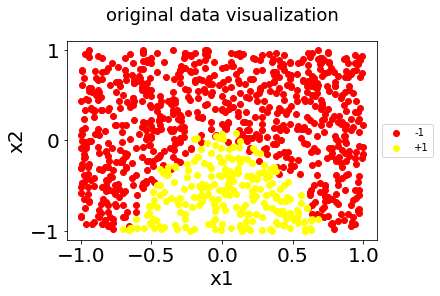

In [6]:
plt.rc('font', size=20)
plt.rcParams['figure.constrained_layout.use'] = True
plt.title("original data visualization",fontsize=18,pad=20)
plt.scatter(x1_neg, x2_neg, color='red')
plt.scatter(x1_pos, x2_pos, color='yellow')
plt.xlabel('x1'); plt.ylabel('x2')
plt.legend(['-1','+1'],loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 10})
plt.savefig('original-data.png', facecolor='w', transparent=False)
plt.show()


In [7]:
#train test split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2,stratify=y)


In [11]:
#training with logistic regression
lr = LogisticRegression(penalty='none',solver='lbfgs')
lr.fit(Xtrain,ytrain)
print(lr.intercept_)
print(lr.coef_)
print(lr.score(Xtest,ytest))

[-2.09258777]
[[ 0.26776534 -3.50759493]]
0.795


In [9]:
#predict
y_pred = lr.predict(Xtest)
predict=np.column_stack([Xtest, y_pred])
df = pd.DataFrame(predict, columns = ['x1','x2','y'])
neg_pred = df[df.y==-1]
pos_pred = df[df.y==1]
x1_pred_neg = neg_pred.iloc[:,0]
x2_pred_neg = neg_pred.iloc[:,1]
x1_pred_pos = pos_pred.iloc[:,0]
x2_pred_pos = pos_pred.iloc[:,1]

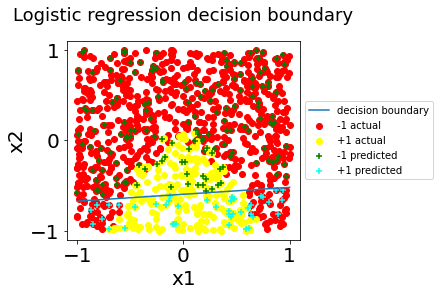

In [10]:

plt.rc('font', size=20)
plt.rcParams['figure.constrained_layout.use'] = True
plt.title("Logistic regression decision boundary",fontsize=18,pad=20)
plt.scatter(x1_neg, x2_neg, color='red')
plt.scatter(x1_pos, x2_pos, color='yellow')
plt.scatter(x1_pred_neg, x2_pred_neg, color='green',marker='+')
plt.scatter(x1_pred_pos, x2_pred_pos, color='cyan',marker='+')
points_x = np.linspace(-1, 1, 1000)
line_bias = lr.intercept_
line_w = lr.coef_.T
points_y=[(line_w[0]*x+line_bias)/(-1*line_w[1]) for x in points_x]
plt.plot(points_x, points_y)
plt.xlabel('x1'); plt.ylabel('x2')
plt.legend(['decision boundary','-1 actual','+1 actual','-1 predicted','+1 predicted'],loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 10})
plt.savefig('logistic.png', facecolor='w', transparent=False)                                                                                                                
plt.show()

# (b) linear SVM classifier

In [12]:
#training with linear SVM classifier
model1 = LinearSVC(C=0.001).fit(Xtrain, ytrain)
print(model1.intercept_)
print(model1.coef_)
print(model1.score(Xtest,ytest))
model2=LinearSVC(C=1).fit(Xtrain, ytrain)
print(model2.intercept_)
print(model2.coef_)
print(model2.score(Xtest,ytest))
model3=LinearSVC(C=100).fit(Xtrain, ytrain)
print(model3.intercept_)
print(model3.coef_)
print(model3.score(Xtest,ytest))

[-0.3239701]
[[ 0.02153284 -0.29051783]]
0.76
[-0.69932519]
[[ 0.10884044 -1.18830231]]
0.795
[-0.68188326]
[[ 0.09327463 -1.24212138]]
0.805


C:\Users\tomzt\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [16]:
#predict
y_pred1 = model1.predict(Xtest)
predict1=np.column_stack([Xtest, y_pred1])
df = pd.DataFrame(predict1, columns = ['x1','x2','y'])
neg_pred1 = df[df.y==-1]
pos_pred1 = df[df.y==1]
x1_pred_neg1 = neg_pred1.iloc[:,0]
x2_pred_neg1 = neg_pred1.iloc[:,1]
x1_pred_pos1 = pos_pred1.iloc[:,0]
x2_pred_pos1 = pos_pred1.iloc[:,1]

y_pred2 = model2.predict(Xtest)
predict2=np.column_stack([Xtest, y_pred2])
df = pd.DataFrame(predict2, columns = ['x1','x2','y'])
neg_pred2 = df[df.y==-1]
pos_pred2 = df[df.y==1]
x1_pred_neg2 = neg_pred2.iloc[:,0]
x2_pred_neg2 = neg_pred2.iloc[:,1]
x1_pred_pos2 = pos_pred2.iloc[:,0]
x2_pred_pos2 = pos_pred2.iloc[:,1]

y_pred3 = model3.predict(Xtest)
predict3=np.column_stack([Xtest, y_pred3])
df = pd.DataFrame(predict3, columns = ['x1','x2','y'])
neg_pred3 = df[df.y==-1]
pos_pred3 = df[df.y==1]
x1_pred_neg3 = neg_pred3.iloc[:,0]
x2_pred_neg3 = neg_pred3.iloc[:,1]
x1_pred_pos3 = pos_pred3.iloc[:,0]
x2_pred_pos3 = pos_pred3.iloc[:,1]

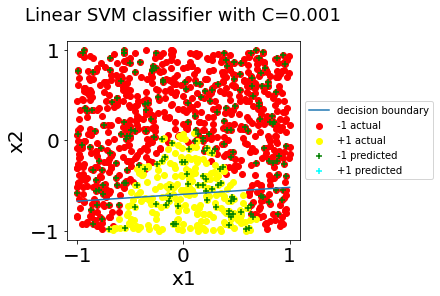

In [18]:
plt.rc('font', size=20)
plt.rcParams['figure.constrained_layout.use'] = True
plt.title("Linear SVM classifier with C=0.001",fontsize=18,pad=20)
plt.scatter(x1_neg, x2_neg, color='red')
plt.scatter(x1_pos, x2_pos, color='yellow')
plt.scatter(x1_pred_neg1, x2_pred_neg1, color='green',marker='+')
plt.scatter(x1_pred_pos1, x2_pred_pos1, color='cyan',marker='+')
points_x = np.linspace(-1, 1, 1000)
line_bias = lr.intercept_
line_w = lr.coef_.T
points_y=-(line_w[0] / line_w[1]) * points_x - line_bias / line_w[1]
plt.plot(points_x, points_y)
plt.xlabel('x1'); plt.ylabel('x2')
plt.legend(['decision boundary','-1 actual','+1 actual','-1 predicted','+1 predicted'],loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 10})
plt.savefig('SVM C0001.png', facecolor='w', transparent=False)                                                                                                              
plt.show()

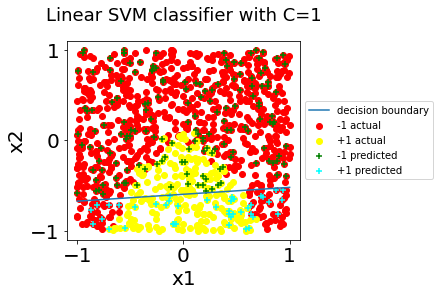

In [20]:
plt.rc('font', size=20)
plt.rcParams['figure.constrained_layout.use'] = True
plt.title("Linear SVM classifier with C=1",fontsize=18,pad=20)
plt.scatter(x1_neg, x2_neg, color='red')
plt.scatter(x1_pos, x2_pos, color='yellow')
plt.scatter(x1_pred_neg2, x2_pred_neg2, color='green',marker='+')
plt.scatter(x1_pred_pos2, x2_pred_pos2, color='cyan',marker='+')
points_x = np.linspace(-1, 1, 1000)
line_bias = lr.intercept_
line_w = lr.coef_.T
points_y=-(line_w[0] / line_w[1]) * points_x - line_bias / line_w[1]
plt.plot(points_x, points_y)
plt.xlabel('x1'); plt.ylabel('x2')
plt.legend(['decision boundary','-1 actual','+1 actual','-1 predicted','+1 predicted'],loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 10})
plt.savefig('SVM C1.png', facecolor='w', transparent=False)                                                                                                                 
plt.show()

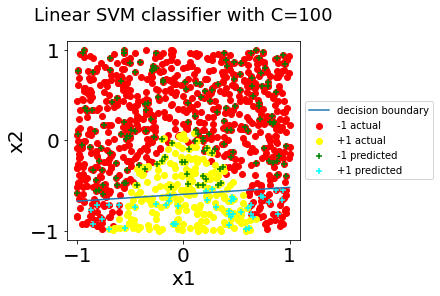

In [22]:
plt.rc('font', size=20)
plt.rcParams['figure.constrained_layout.use'] = True
plt.title("Linear SVM classifier with C=100",fontsize=18,pad=20)
plt.scatter(x1_neg, x2_neg, color='red')
plt.scatter(x1_pos, x2_pos, color='yellow')
plt.scatter(x1_pred_neg3, x2_pred_neg3, color='green',marker='+')
plt.scatter(x1_pred_pos3, x2_pred_pos3, color='cyan',marker='+')
points_x = np.linspace(-1, 1, 1000)
line_bias = lr.intercept_
line_w = lr.coef_.T
points_y=-(line_w[0] / line_w[1]) * points_x - line_bias / line_w[1]
plt.plot(points_x, points_y)
plt.xlabel('x1'); plt.ylabel('x2')
plt.legend(['decision boundary','-1 actual','+1 actual','-1 predicted','+1 predicted'],loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 10 })
plt.savefig('SVM C100.png', facecolor='w', transparent=False)                                                                                                                
plt.show()

# (c) Logistic regression with two additional features

In [25]:
x3 = x1 **2
x4 = x2 **2
X=np.column_stack((x1,x2,x3,x4))



In [26]:
#train test split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2,stratify=y)

In [27]:
#training with logistic regression
lr4 = LogisticRegression(penalty='none',solver='lbfgs')
lr4.fit(Xtrain,ytrain)
print(lr4.intercept_)
print(lr4.coef_)
print(lr4.score(Xtest,ytest))

[0.27769451]
[[  0.56086856 -26.41252756 -52.48406028  -0.37769103]]
0.955


In [28]:
#predict
y_pred = lr4.predict(Xtest)
predict=np.column_stack([Xtest, y_pred])
df = pd.DataFrame(predict, columns = ['x1','x2','x3','x4','y'])
neg_pred = df[df.y==-1]
pos_pred = df[df.y==1]
x1_pred_neg4 = neg_pred.iloc[:,0]
x2_pred_neg4 = neg_pred.iloc[:,1]
x1_pred_pos4 = pos_pred.iloc[:,0]
x2_pred_pos4 = pos_pred.iloc[:,1]

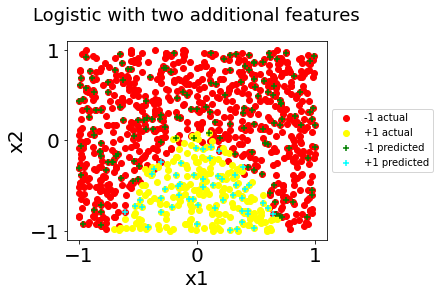

In [30]:
plt.rc('font', size=20)
plt.rcParams['figure.constrained_layout.use'] = True
plt.title("Logistic with two additional features",fontsize=18,pad=20)
plt.scatter(x1_neg, x2_neg, color='red')
plt.scatter(x1_pos, x2_pos, color='yellow')
plt.scatter(x1_pred_neg4, x2_pred_neg4, color='green',marker='+')
plt.scatter(x1_pred_pos4, x2_pred_pos4, color='cyan',marker='+')

plt.xlabel('x1'); plt.ylabel('x2')
plt.legend(['-1 actual','+1 actual','-1 predicted','+1 predicted'],loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 10  })
plt.savefig('SVMAdditional.png', facecolor='w', transparent=False)                                                                                                                
plt.show()